# Seasonal Forecast

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from core import data_util as du

In [3]:
from core import data_util as du

## Section 1: Fix data

In [4]:
df = du.read_csv('../data/2017/trade_confirm.csv')

In [5]:
du.check_data(df)

Datetime Range: [2017-11-21 18:02:00] ~ [2017-12-21 18:01:00]
Columns: ['tomcat_biz_fromlog_access_count{path=/gstrade/trade/tradeConfirm/1.0}']
Points Per Day: 1393.55
Missing Data: 2/31(6.45%)
Nan Percentage: 14.72%


'Missing Data: 2/31(6.45%)\nNan Percentage: 14.72%'

In [6]:
du.check_data(du.fix_data(df, method='default'), verbose=1)

'2017-11-21': Shape: (358, 1) . NaN: 0(0.00%)
'2017-11-22': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-23': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-24': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-25': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-26': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-27': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-28': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-29': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-30': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-01': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-02': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-03': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-04': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-05': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-06': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-07': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-08': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-09': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-10': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-11': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-12': 

"Missing Data: 2/31(6.45%)\nMissing Date: ['2017-11-21', '2017-12-21']\nNan Percentage: 0.00%"

In [7]:
du.check_data(du.fix_data(df, method='more'), verbose=1)

'2017-11-21': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-22': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-23': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-24': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-25': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-26': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-27': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-28': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-29': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-11-30': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-01': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-02': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-03': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-04': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-05': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-06': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-07': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-08': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-09': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-10': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-11': Shape: (1440, 1) . NaN: 0(0.00%)
'2017-12-12':

'Missing Data: 0/31(0.00%)\nMissing Date: []\nNan Percentage: 0.00%'

## Section 2: TSR decomposition

In [8]:
test_df = du.fix_data(df, method='more')

In [9]:
test_array = test_df.values.copy()

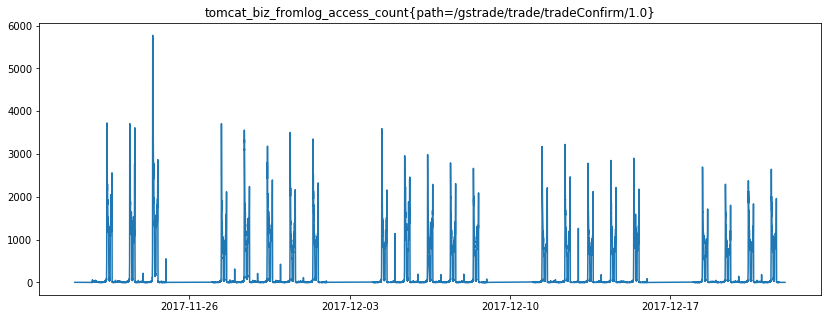

In [10]:
test_df_long = du.get_workday_data(test_df)
du.view_data(test_df_long, title=str(test_df_long.columns[0]))

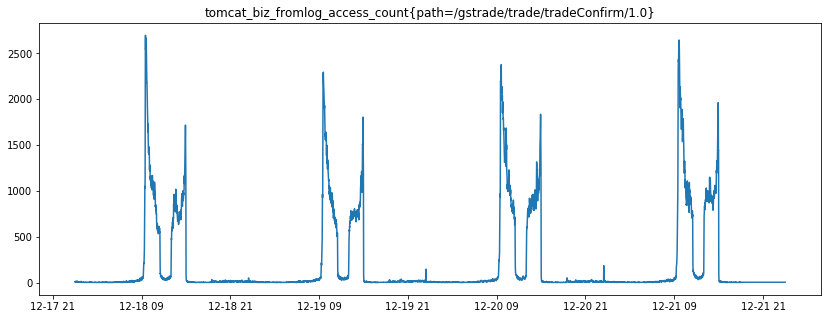

In [11]:
test_df_short = test_df.iloc[-1440*4:]
du.view_data(test_df_short, title=str(test_df_long.columns[0]))

#### Test rolling mean

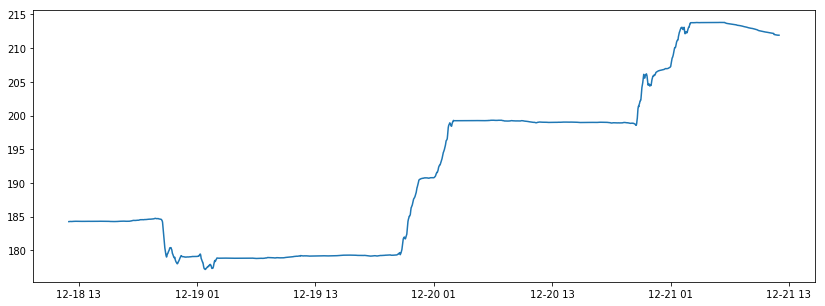

In [12]:
du.view_data(test_df_short.rolling(1440, center=True).mean())

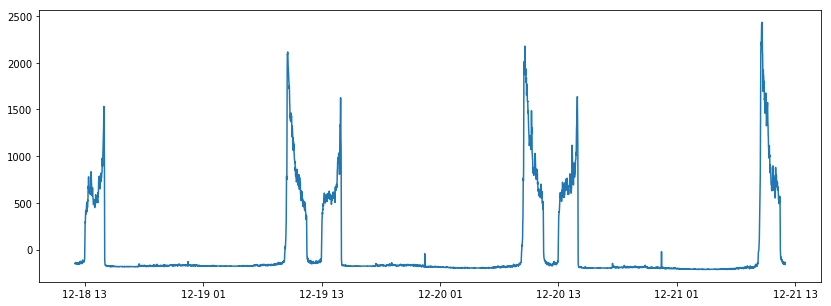

In [13]:
du.view_data(test_df_short - test_df_short.rolling(1440, center=True).mean())

#### Test convolve

In [14]:
from scipy import signal

In [15]:
freq = 1440

filt = np.repeat(1./freq, freq)[:,None]

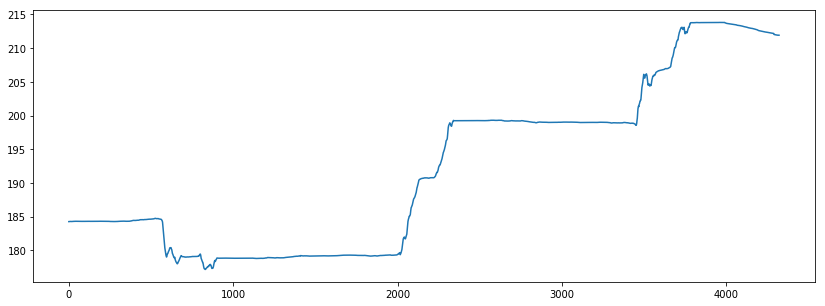

In [16]:
du.view_data(signal.convolve(test_df_short.values, filt, mode='valid'))

#### Test seasonal decompose

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

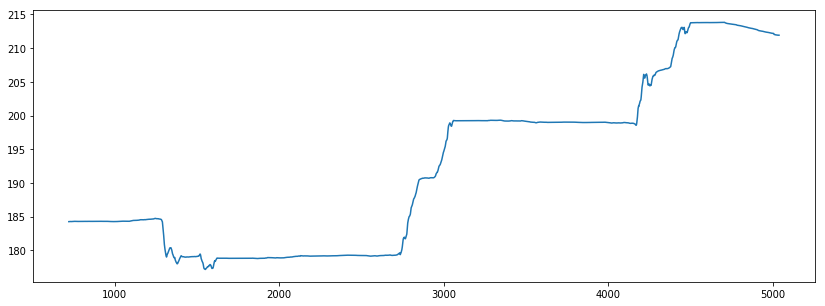

In [18]:
du.view_data(seasonal_decompose(test_df_short.values.ravel(), model='additive', freq=1440).trend)

#### Define extract_trend function

In [19]:
def extract_trend(df):
    df_re = du.get_workday_data(du.fix_data(df, method="more"))
#     return df_re.rolling(1440, center=True, axis=0).mean().interpolate(limit_direction='both')
    return df_re.rolling(1440, center=True, axis=0).mean()

In [20]:
t1 = du.read_csv('../data/2017/gsbp_perhost.csv')
t1.head()

tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=DVJTY4-GSBP138, servicecode=GSBP}  \
Time                                                                                                                                                                                    
2017-11-07 20:31:00                                            0.50775                                                                                                                  
2017-11-07 20:32:00                                            0.47445                                                                                                                  
2017-11-07 20:33:00                                            0.57435                                                                                                                  
2017-11-07 20:34:00                                            0.50780                                                                                                                  
2017-11-07 20:35:00                                            0.36630                                                                                                                  

                     tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=ZVJTY4-GSBP157, servicecode=GSBP}  \
Time                                                                                                                                                                                    
2017-11-07 20:31:00                                            0.61555                                                                                                                  
2017-11-07 20:32:00                                            0.51145                                                                                                                  
2017-11-07 20:33:00                                            0.64490                                                                                                                  
2017-11-07 20:34:00                                            0.79085                                                                                                                  
2017-11-07 20:35:00                                            0.74880                                                                                                                  

                     tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=DVJTY4-GSBP139, servicecode=GSBP}  \
Time                                                                                                                                                                                    
2017-11-07 20:31:00                                             0.4495                                                                                                                  
2017-11-07 20:32:00                                             0.5827                                                                                                                  
2017-11-07 20:33:00                                             0.5993                                                                                                                  
2017-11-07 20:34:00                                             0.3163                                                                                                                  
2017-11-07 20:35:00                                             0.3330                                                                                                                  

                     tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=

In [21]:
du.check_data(t1)

Datetime Range: [2017-11-07 20:31:00] ~ [2017-12-07 20:30:00]
Columns: ['tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=DVJTY4-GSBP138, servicecode=GSBP}', 'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=ZVJTY4-GSBP157, servicecode=GSBP}', 'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=DVJTY4-GSBP139, servicecode=GSBP}', 'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=ZVJTY4-GSBP158, servicecode=GSBP}']
Points Per Day: 1335.16
Missing Data: 31/31(100.00%)
Nan Percentage: 0.09%


'Missing Data: 31/31(100.00%)\nNan Percentage: 0.09%'

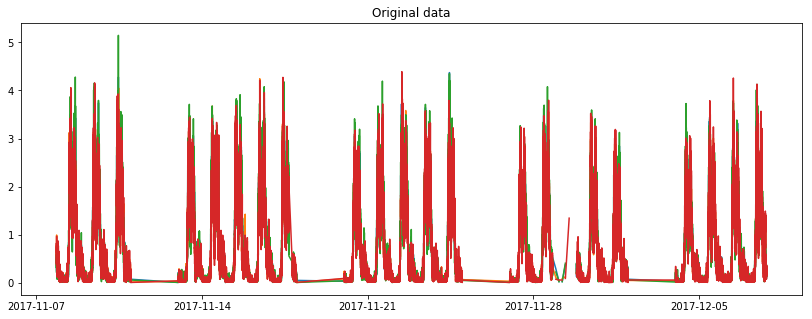

In [22]:
du.view_data(du.get_workday_data(t1), title='Original data')

In [23]:
trend = extract_trend(t1)

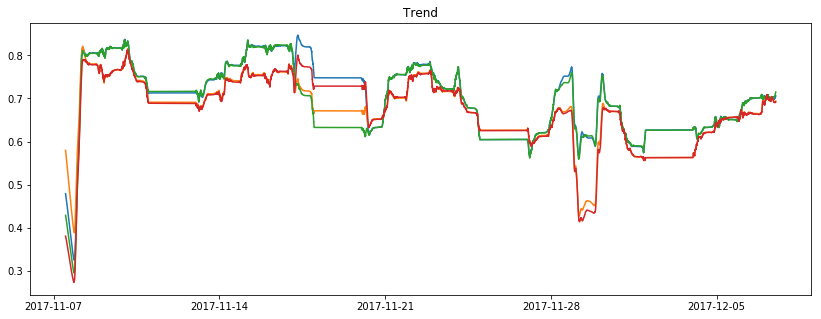

In [24]:
du.view_data(extract_trend(t1), title='Trend')

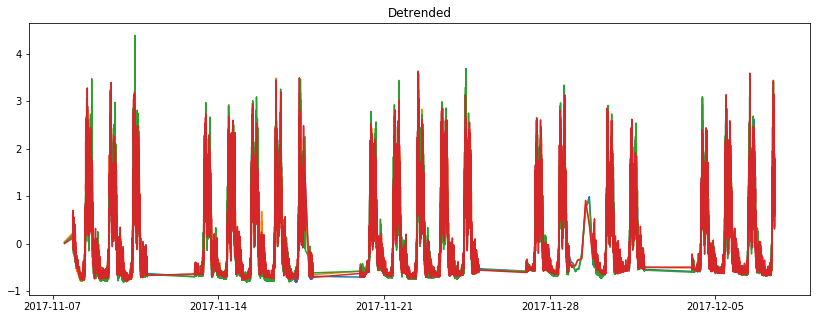

In [25]:
du.view_data(du.get_workday_data(du.fix_data(t1, method='more')) - extract_trend(t1), title='Detrended')

In [26]:
detrended = np.array(du.get_workday_data(du.fix_data(t1, method='more')) - extract_trend(t1))

In [27]:
period_average = np.array([pd.core.nanops.nanmean(detrended[i::freq], axis=0) for i in range(freq)])

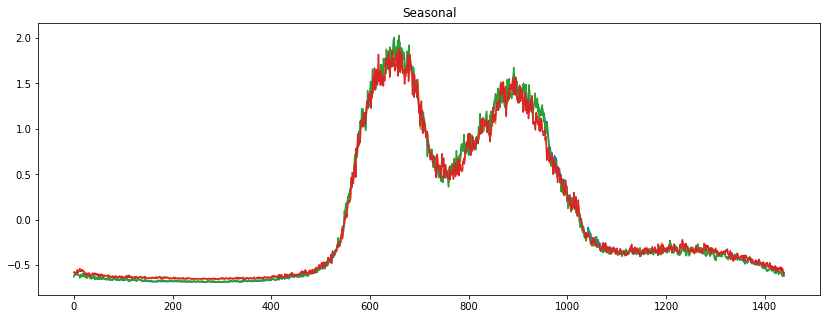

In [28]:
du.view_data(period_average, title='Seasonal')

In [29]:
resid = detrended - np.tile(period_average.T, detrended.shape[0] // period_average.shape[0]).T
upper_min_thresh = du.smooth(np.array([pd.core.nanops.nanmax(resid[i::freq], axis=0) for i in range(freq)])[:,1], window_len=55)
lower_min_thresh = du.smooth(np.array([pd.core.nanops.nanmin(resid[i::freq], axis=0) for i in range(freq)])[:,1], window_len=55)

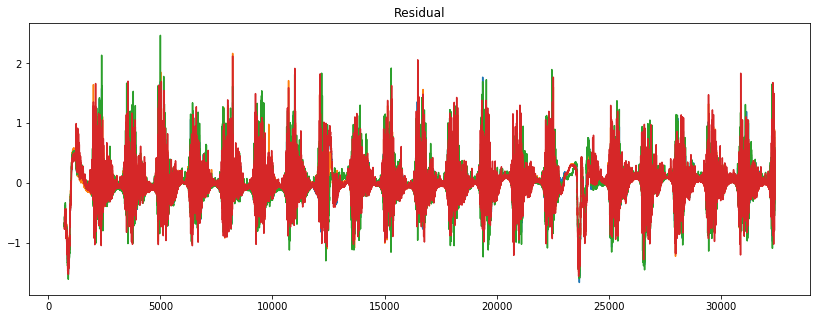

In [30]:
du.view_data(resid, title='Residual')

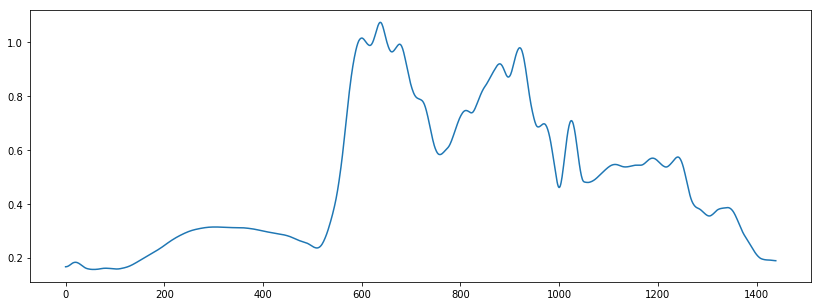

In [31]:
du.view_data(upper_min_thresh)

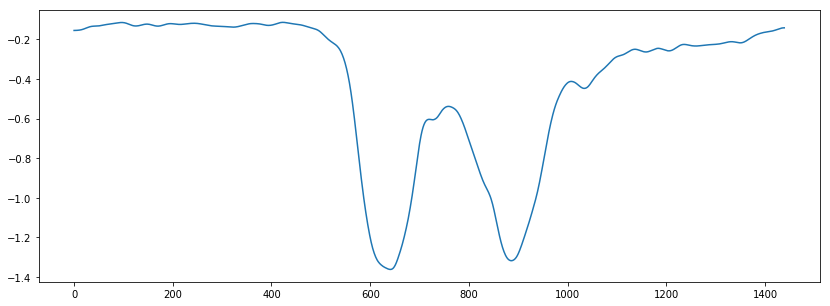

In [32]:
du.view_data(lower_min_thresh)

## Section 3:  Forecast

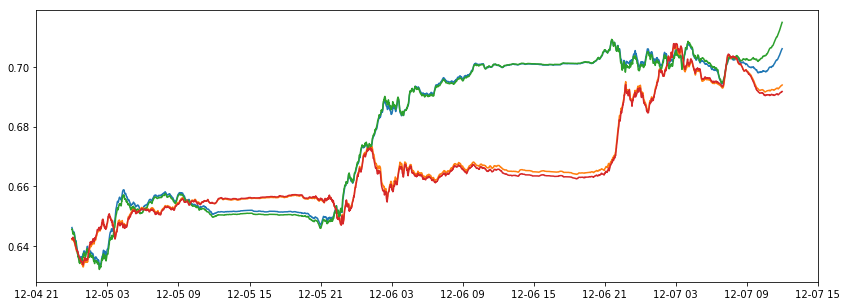

In [33]:
du.view_data(trend[-1440*3:])

In [34]:
baseline = period_average
upper_trend = np.array([pd.core.nanops.nanmax(trend[i::freq].rolling(5, center=True).quantile(0.8), axis=0) for i in range(freq)])
lower_trend = np.array([pd.core.nanops.nanmin(trend[i::freq].rolling(5).quantile(0.2), axis=0) for i in range(freq)])
upper_min_thresh = np.array([pd.core.nanops.nanmax(resid[i::freq], axis=0) for i in range(freq)])
lower_min_thresh = np.array([pd.core.nanops.nanmin(resid[i::freq], axis=0) for i in range(freq)])

In [35]:
lower_trend

array([[0.63198777, 0.5583018 , 0.62717545, 0.5567476 ],
       [0.6316571 , 0.55840581, 0.6271216 , 0.55681704],
       [0.63138892, 0.55872287, 0.62652899, 0.55733912],
       ...,
       [0.6329826 , 0.55778514, 0.62823388, 0.55617472],
       [0.63274558, 0.55799708, 0.62780146, 0.55661139],
       [0.6324378 , 0.55823476, 0.6276989 , 0.55675321]])

In [36]:
def adjust_up(x, k):
    """
    Adjust upper.
    """
    return (1 + k * x / x.max()) * x

def adjust_low(x, k):
    """
    Adjust lower.
    """
    return (1 - k * x / x.max()) * x

def smooth(X, window_len=11, window='hanning'):
    return np.array([du.smooth(x, window_len, window) for x in X.T]).T
        

In [37]:
freq = 1440
def str_decompose(df):
    df_re = du.get_workday_data(du.fix_data(df, method="more"))
    trend = df_re.rolling(1440, center=True, axis=0).mean()
    detrended = np.array(df_re - trend)
    seasonal = np.array([pd.core.nanops.nanmedian(detrended[i::freq], axis=0) for i in range(freq)])
    resid = detrended - np.tile(seasonal.T, detrended.shape[0] // seasonal.shape[0]).T
    return seasonal, trend, resid

def dynamic_threshold(df):
    seasonal, trend, resid = str_decompose(df)
    baseline = seasonal
    upper_trend = np.array([pd.core.nanops.nanmax(trend[i::freq].rolling(4).quantile(0.9), axis=0) for i in range(freq)])
    lower_trend = np.array([pd.core.nanops.nanmin(trend[i::freq].rolling(4).quantile(0.4), axis=0) for i in range(freq)])
#     upper_min_thresh = np.array([pd.core.nanops.nanmax(resid[i::freq], axis=0) for i in range(freq)])
#     lower_min_thresh = np.array([pd.core.nanops.nanmin(resid[i::freq], axis=0) for i in range(freq)])
    upper_min_thresh = np.array([np.nanmax(resid[i::freq], axis=0) for i in range(freq)])
    lower_min_thresh = np.array([np.nanmin(resid[i::freq], axis=0) for i in range(freq)])
    upper_thresh = smooth(baseline + upper_trend + upper_min_thresh, window_len=55)
    lower_thresh = smooth(baseline + lower_trend + lower_min_thresh, window_len=55)
    return upper_thresh, lower_thresh

In [38]:
_, t, r = str_decompose(t1)

In [39]:
du.check_data(t)

Datetime Range: [2017-11-07 00:00:00] ~ [2017-12-07 23:59:00]
Columns: ['tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=DVJTY4-GSBP138, servicecode=GSBP}', 'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=ZVJTY4-GSBP157, servicecode=GSBP}', 'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=DVJTY4-GSBP139, servicecode=GSBP}', 'tomcat_raw_zabbix_jmxCatalinatypeGlobalRequestProcessor_namehttp_HTTP_PROTOCOL_HTTP_PORT_requestCount{appsystem=JTY4, hostname=ZVJTY4-GSBP158, servicecode=GSBP}']
Points Per Day: 1440
Missing Data: 0/23(0.00%)
Nan Percentage: 4.34%


'Missing Data: 0/23(0.00%)\nNan Percentage: 4.34%'

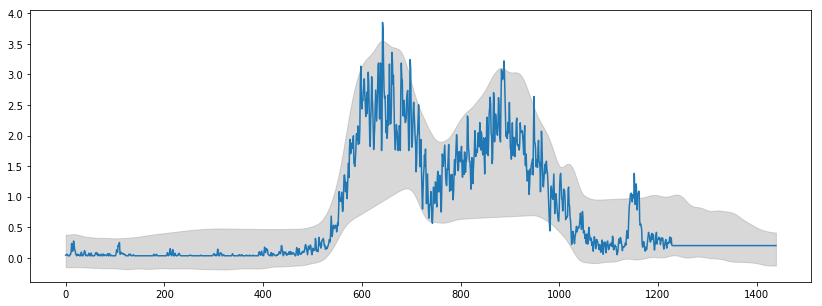

In [62]:
u, l = dynamic_threshold(t1)

t = np.linspace(0, len(u[:,1])-1, len(u[:,1]))
plt.figure(figsize=(14, 5))
plt.fill_between(t, l[:, 1], u[:, 1], color='gray', alpha=0.3)
plt.plot(du.fix_data(t1, method='more').values[-1*1440:][:,1])
plt.show()

In [61]:
u.shape

(1440, 1)

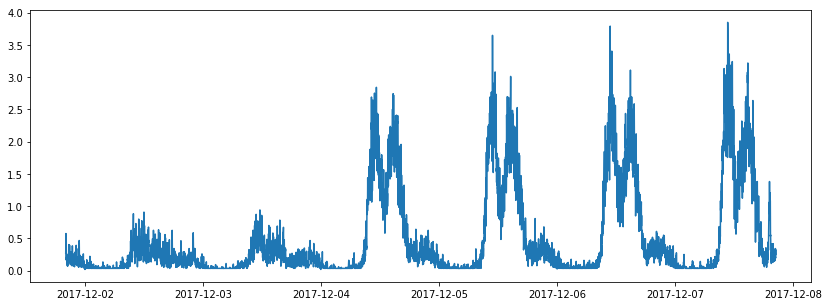

In [41]:
du.view_data(t1.iloc[-1440*6:, [1]])

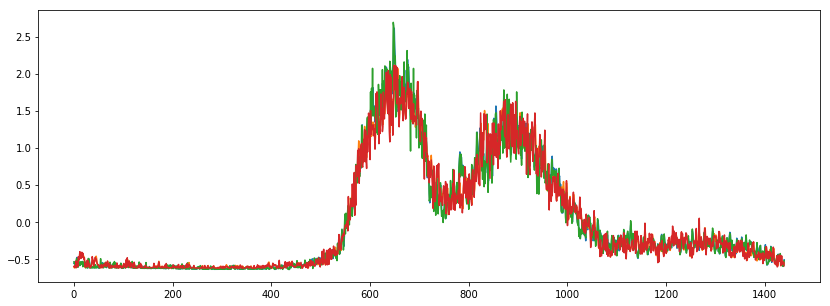

In [42]:
du.view_data(str_decompose(t1.iloc[-1440*6:])[0])

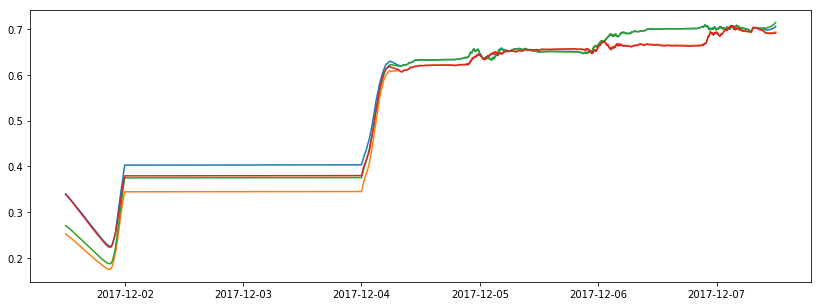

In [43]:
du.view_data(str_decompose(t1.iloc[-1440*6:])[1])

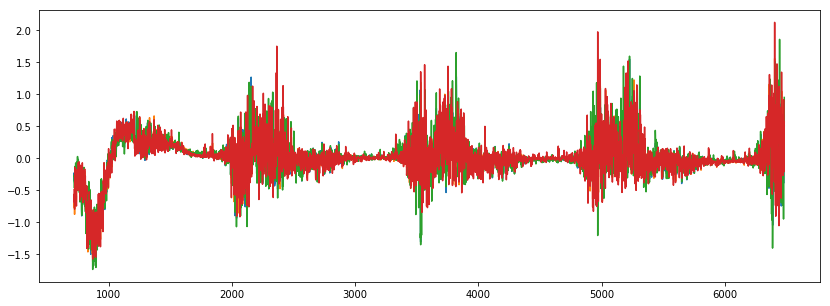

In [44]:
du.view_data(str_decompose(t1.iloc[-1440*6:])[2])

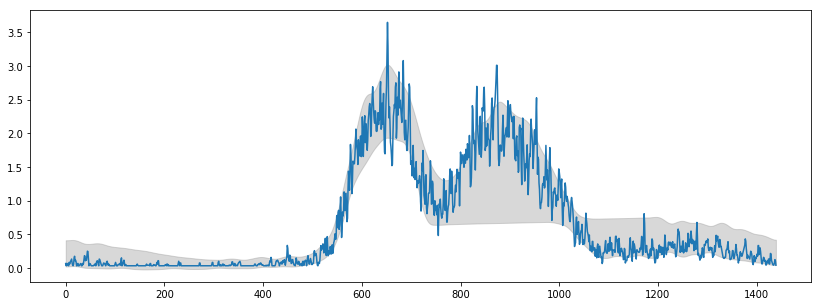

In [45]:
u, l = dynamic_threshold(t1[-1440*6:])

t = np.linspace(0, len(u[:,1])-1, len(u[:,1]))
plt.figure(figsize=(14, 5))
plt.fill_between(t, l[:, 1], u[:, 1], color='gray', alpha=0.3)
plt.plot(du.fix_data(t1, method='more').values[-3*1440:-2*1440][:,1])
plt.show()

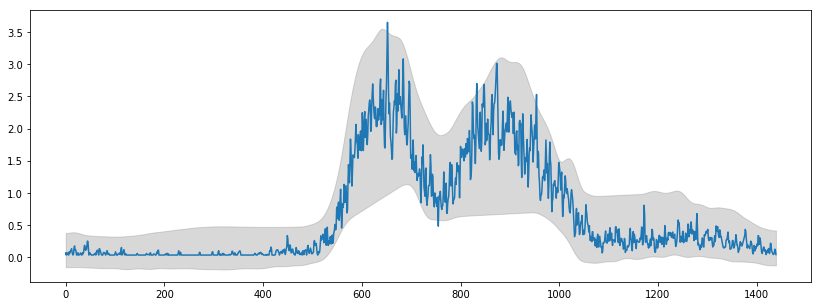

In [46]:
u, l = dynamic_threshold(t1)

t = np.linspace(0, len(u[:,1])-1, len(u[:,1]))
plt.figure(figsize=(14, 5))
plt.fill_between(t, l[:, 1], u[:, 1], color='gray', alpha=0.3)
plt.plot(du.fix_data(t1, method='more').values[-3*1440:-2*1440][:,1])
plt.show()

#### Test str_decompose

In [47]:
t2 = du.read_csv('../data/2017/trade_perhost.csv').iloc[-1440*5:]

In [48]:
s, t, r = str_decompose(t2)

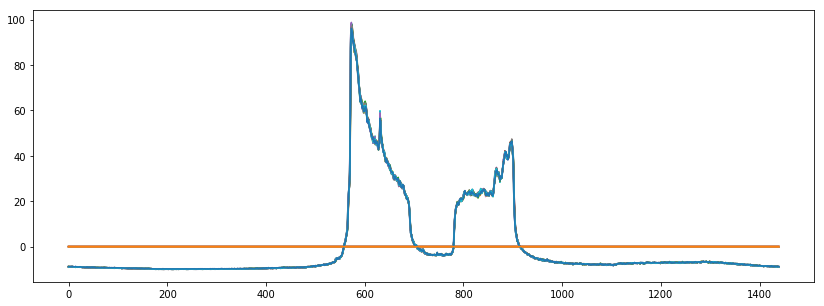

In [49]:
du.view_data(s)

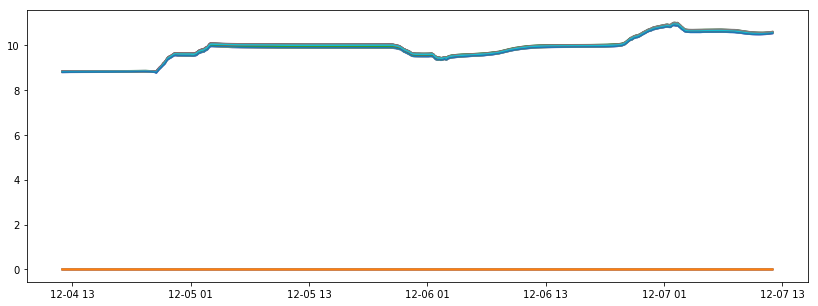

In [50]:
du.view_data(t)

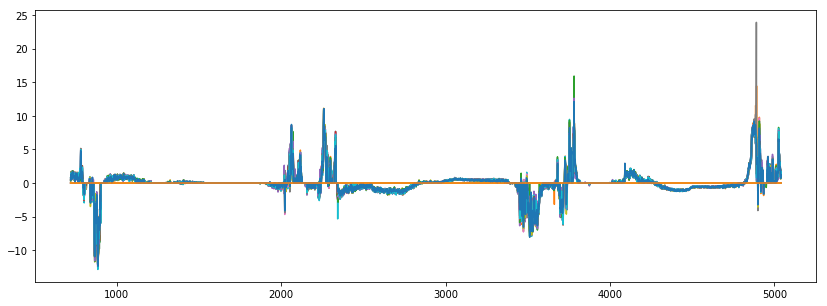

In [51]:
du.view_data(r)

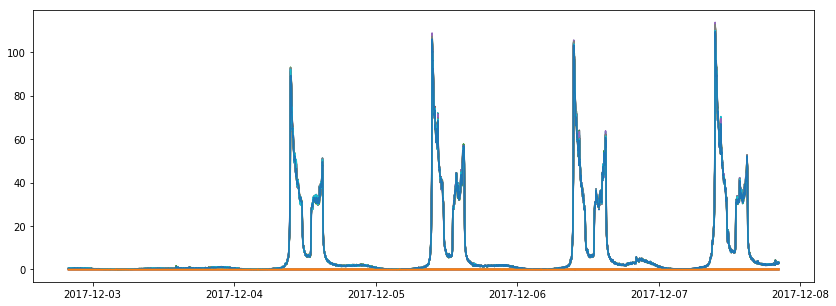

In [52]:
du.view_data(t2)

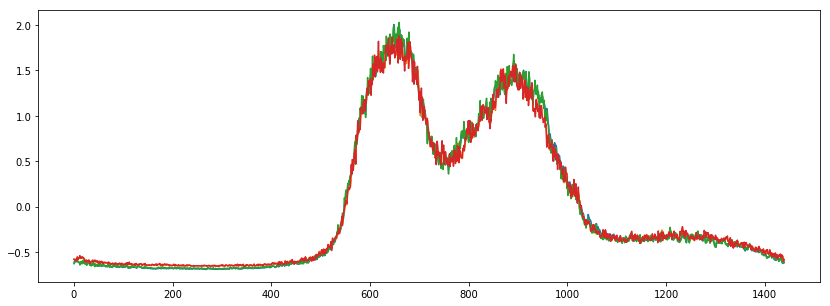

In [53]:
du.view_data(baseline)

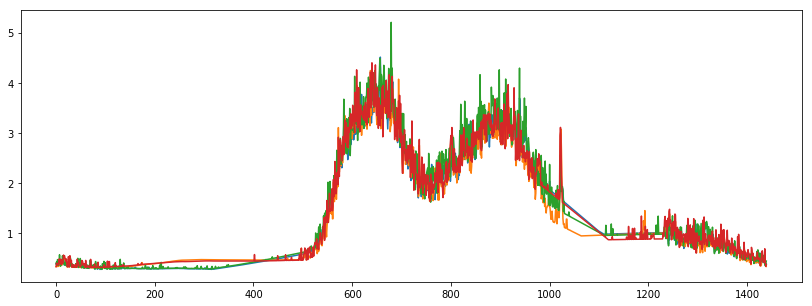

In [54]:
du.view_data(upper_trend+upper_min_thresh+baseline)

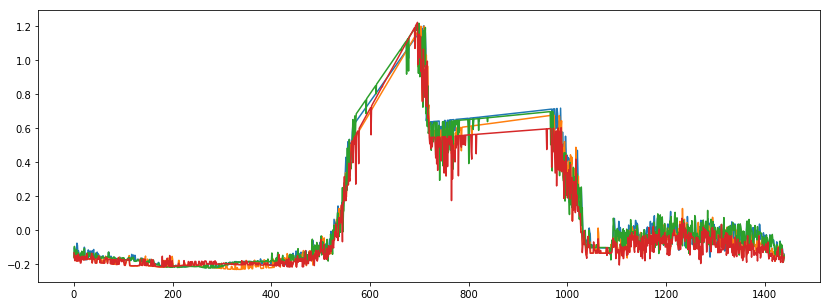

In [55]:
du.view_data(lower_trend+lower_min_thresh+baseline)